<a href="https://colab.research.google.com/github/ashish2179/MachineLearning/blob/master/titanic/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import io
import requests

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
train_url= 'https://raw.githubusercontent.com/ashish2179/MachineLearning/master/titanic/train.csv'
test_url = 'https://raw.githubusercontent.com/ashish2179/MachineLearning/master/titanic/test.csv'

train=requests.get(train_url).content
train_df =pd.read_csv(io.StringIO(train.decode('utf-8')))

test = requests.get(test_url).content
test_df = pd.read_csv(io.StringIO(test.decode('utf-8')))

combine = [train_df, test_df]

In [14]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone,Age*Class
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,0,NaN,0,0,54.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,0,B42,0,0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,0,NaN,0,0,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,0,C148,1,0,26.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,0,NaN,2,0,96.0


In [49]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null int64
Cabin          204 non-null object
Embarked       891 non-null int64
IsAlone        891 non-null int64
Age*Class      714 non-null float64
dtypes: float64(2), int64(8), object(4)
memory usage: 97.5+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null 

In [50]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,IsAlone,Age*Class
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.0,891.000000,891.0,714.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,0.0,0.361392,0.0,61.938151
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,0.0,0.635673,0.0,34.379609
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.0,0.000000,0.0,0.920000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,0.0,0.000000,0.0,38.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,0.0,0.000000,0.0,58.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,0.0,1.000000,0.0,81.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,0.0,2.000000,0.0,222.000000


In [51]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin
count,891,891,891,204
unique,891,2,681,147
top,"Risien, Mr. Samuel Beard",male,1601,G6
freq,1,577,7,4


In [52]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [53]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [54]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [55]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


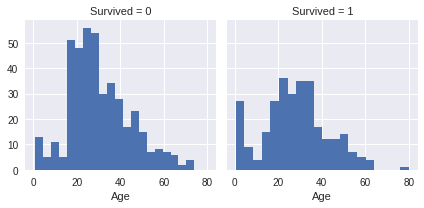

In [56]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

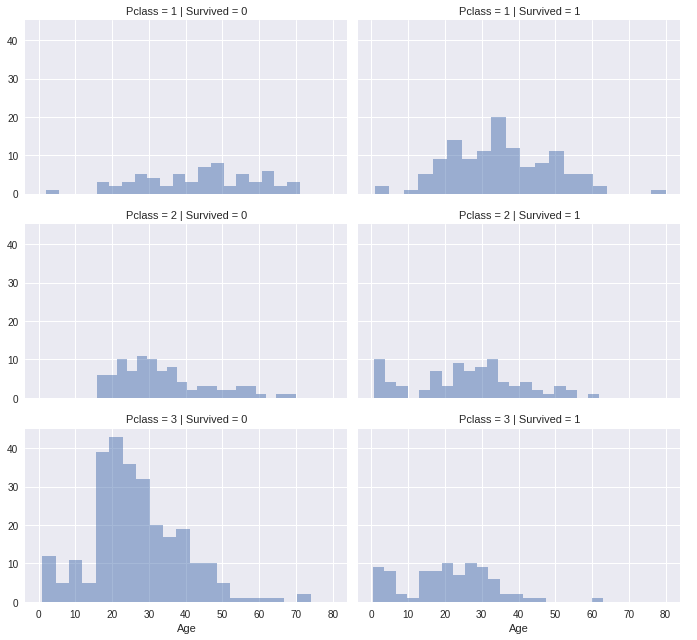

In [59]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass',  aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


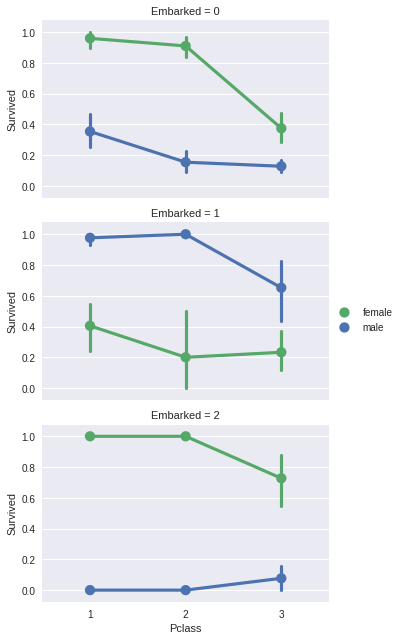

In [61]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


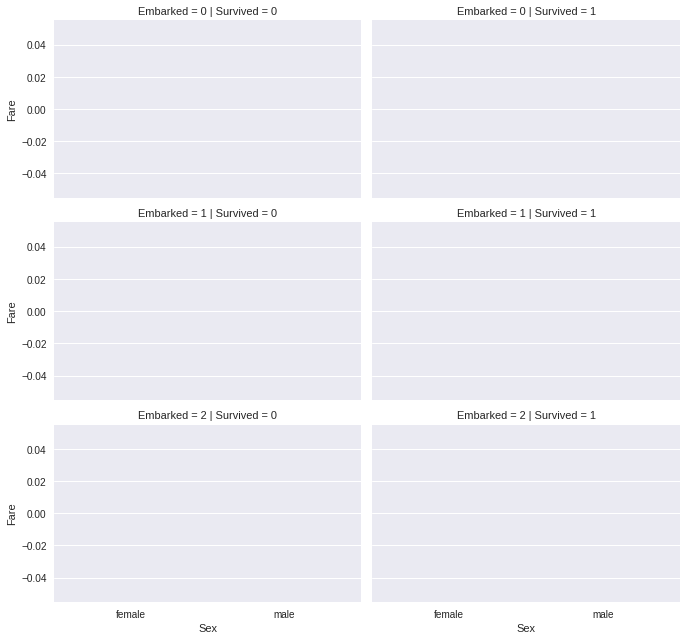

In [63]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()


In [64]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 14) (418, 12) (891, 14) (418, 12)
After (891, 12) (418, 10) (891, 12) (418, 10)


In [65]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [66]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [67]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone,Age*Class,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,0,0,0,66.00,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,0,1,0,38.00,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,0,0,0,78.00,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,0,0,0,35.00,3
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,0,0,0,105.00,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,0,2,0,NaN,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,0,0,0,54.00,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,0,0,0,6.00,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,0,0,0,81.00,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,0,1,0,28.00,3


In [68]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 11), (418, 10))

In [69]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone,Age*Class,Title
0,0,3,0,22.0,1,0,0,0,0,66.0,1
1,1,1,1,38.0,1,0,0,1,0,38.0,3
2,1,3,1,26.0,0,0,0,0,0,78.0,2
3,1,1,1,35.0,1,0,0,0,0,35.0,3
4,0,3,0,35.0,0,0,0,0,0,105.0,1


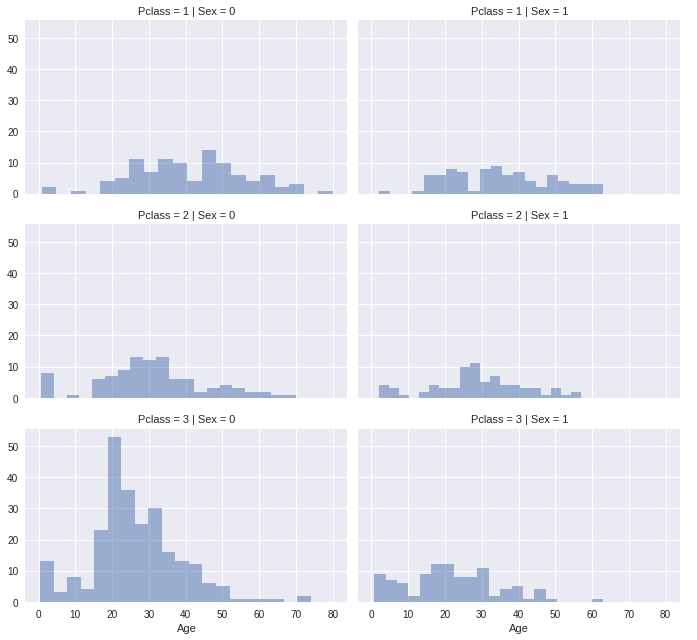

In [71]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [72]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [73]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone,Age*Class,Title
0,0,3,0,22,1,0,0,0,0,66.0,1
1,1,1,1,38,1,0,0,1,0,38.0,3
2,1,3,1,26,0,0,0,0,0,78.0,2
3,1,1,1,35,1,0,0,0,0,35.0,3
4,0,3,0,35,0,0,0,0,0,105.0,1


In [74]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [75]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone,Age*Class,Title,AgeBand
0,0,3,0,1,1,0,0,0,0,66.0,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,0,1,0,38.0,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,0,0,0,78.0,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,0,0,0,35.0,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,0,0,0,105.0,1,"(32.0, 48.0]"


In [76]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone,Age*Class,Title
0,0,3,0,1,1,0,0,0,0,66.0,1
1,1,1,1,2,1,0,0,1,0,38.0,3
2,1,3,1,1,0,0,0,0,0,78.0,2
3,1,1,1,2,1,0,0,0,0,35.0,3
4,0,3,0,2,0,0,0,0,0,105.0,1


In [77]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [78]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [79]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class,Title
0,0,3,0,1,0,0,0,66.0,1
1,1,1,1,2,0,1,0,38.0,3
2,1,3,1,1,0,0,1,78.0,2
3,1,1,1,2,0,0,0,35.0,3
4,0,3,0,2,0,0,1,105.0,1


In [80]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [81]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

0

In [84]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


In [0]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

In [85]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Age*Class,Title,IsAlone
0,892,3,0,2,0,2,6,1,1
1,893,3,1,2,0,0,6,3,0
2,894,2,0,3,0,2,6,1,1
3,895,3,0,1,0,0,3,1,1
4,896,3,1,1,0,0,3,3,0


In [0]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

In [0]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

In [88]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Age*Class,Title,IsAlone
0,892,3,0,2,0,2,6,1,1
1,893,3,1,2,0,0,6,3,0
2,894,2,0,3,0,2,6,1,1
3,895,3,0,1,0,0,3,1,1
4,896,3,1,1,0,0,3,3,0
5,897,3,0,0,0,0,0,1,1
6,898,3,1,1,0,2,3,2,1
7,899,2,0,1,0,0,2,1,0
8,900,3,1,1,0,1,3,3,1
9,901,3,0,1,0,0,3,1,0


In [89]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [0]:
# # Logistic Regression

# logreg = LogisticRegression()
# logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
# acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
# acc_log

In [90]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

84.29

In [0]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)